In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')



data_info = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
data_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz') 
data_reviews = pd.read_csv('data/zippedData/rotten_tomatoes_critic_reviews.csv.gz')
data_movies = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')


# Observing the different Tables Available. 

 >**Considering movie information, budget, and reviews to understand what their data represents.**

In [14]:
data_movies.head(2)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [15]:
data_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [16]:
new_movie = data_info.loc[:,('movie_title','critics_consensus','actors','production_company','tomatometer_status','tomatometer_rating','audience_rating','tomatometer_rotten_critics_count')]

new_movie.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19


## Merging the Tables that we want to Study and Organizing it




In [17]:
movie_overview= pd.merge(new_movie,data_budgets,how='inner',left_on='movie_title',right_on='movie')

In [18]:
movie_overview2 = pd.merge(movie_overview,data_movies, how='inner', left_on='movie_title',right_on='title')
movie_overview_columnDrop = movie_overview2.drop(['domestic_gross','movie','genre_ids','original_title','title','original_language','release_date_x','id_x'], axis = 1)
movie_overview_columnDrop.head(2)


,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81


# Organizing & Cleaning Data

## Data Cleaning: Dropping Empty (null) Values - If Present

1. **Observation:**

> **Determining how many null values are present.**

In [19]:
movie_overview_columnDrop.isnull().sum()

movie_title                           0
critics_consensus                   429
actors                               10
production_company                   18
tomatometer_status                    0
tomatometer_rating                    0
audience_rating                       5
tomatometer_rotten_critics_count      0
production_budget                     0
worldwide_gross                       0
id_y                                  0
popularity                            0
release_date_y                        0
vote_average                          0
vote_count                            0
dtype: int64

2. **Sanity Check:**

>**Double checking to ensure that we are not removing more that roughly 1% of our tables when removing duplicates.**

In [29]:
cellTotal = np.product(movie_overview_columnDrop.shape)

missing_values_count = movie_overview_columnDrop.isnull().sum()
total_missing = missing_values_count.sum()


percent_missing = (total_missing/cellTotal) * 100
print(percent_missing)

1.232


3. **Remove Rows With Empty Values:**

In [30]:
movie_overview_columnDrop.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81


In [31]:
movie_overview_dropNull = movie_overview_columnDrop.dropna()
movie_overview_dropNull.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81


> **Ensuring that there are no longer any rows without information present**

In [32]:
movie_overview_dropDuplicates.isnull().sum()

NameError: name 'movie_overview_dropDuplicates' is not defined

## Data Cleaning: Dropping Duplicate Values - If Present 

In [33]:
movie_overview_dropDuplicates = movie_overview_dropNull.drop_duplicates(subset=['movie_title'], keep='last')

## Data Cleaning: Changing Budget and Gross Profit to Integers to Calculate Profit. 

In [34]:
movie_overview_dropDuplicates.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81


**Data Cleaning: Remove**

Taking dollar signs and commas out of the wide gross and production columns to ensure that they can be divided as integers and or floats.


In [35]:
movie_overview_dropDuplicates['worldwide_gross']= movie_overview_dropDuplicates['worldwide_gross'].str.replace('$','').str.replace(',','')
movie_overview_dropDuplicates['production_budget']= movie_overview_dropDuplicates['production_budget'].str.replace('$','').str.replace(',','')


In [36]:
movie_overview_dropDuplicates['worldwide_gross'] = movie_overview_dropDuplicates.worldwide_gross.astype(int)
movie_overview_dropDuplicates['production_budget'] = movie_overview_dropDuplicates.production_budget.astype(int)




In [37]:
movie_overview_dropDuplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       1455 non-null   object 
 1   critics_consensus                 1455 non-null   object 
 2   actors                            1455 non-null   object 
 3   production_company                1455 non-null   object 
 4   tomatometer_status                1455 non-null   object 
 5   tomatometer_rating                1455 non-null   float64
 6   audience_rating                   1455 non-null   float64
 7   tomatometer_rotten_critics_count  1455 non-null   int64  
 8   production_budget                 1455 non-null   int64  
 9   worldwide_gross                   1455 non-null   int64  
 10  id_y                              1455 non-null   int64  
 11  popularity                        1455 non-null   float64
 12  releas

# Isolating Values to Determine Movie Success and Cleaning Actor Column


## Adding a New Profit Column, and Isolating Columns to Better Understand Each Movie by Rating, Actors, and Profit.


>**Creating a New Profit Column and  Isolating Columns**

1. **Added new profit column.**

In [38]:
movie_overview_dropDuplicates['movie_profit'] = movie_overview_dropDuplicates.worldwide_gross - movie_overview_dropDuplicates.production_budget
movie_overview_dropDuplicates.head(2)


,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count,movie_profit
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,95000000,223050874,32657,26.691,2010-02-11,6.1,4229,128050874
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,3000000,4570178,40247,5.945,2010-01-22,6.3,81,1570178


2. **Creating a new data frame containing our targeted values (columns) and dropping index column.**

In [39]:
# isolating columns to study movie success more in depth 
movie_actor_budget = movie_overview_dropDuplicates[['movie_title','actors','tomatometer_status','tomatometer_rating','movie_profit','production_budget']].sort_values(by='production_budget', ascending = False)
                            
movie_actor_budget.reset_index(level=0, inplace=True)


> **Observing index column**

In [40]:
movie_actor_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1455 non-null   int64  
 1   movie_title         1455 non-null   object 
 2   actors              1455 non-null   object 
 3   tomatometer_status  1455 non-null   object 
 4   tomatometer_rating  1455 non-null   float64
 5   movie_profit        1455 non-null   int64  
 6   production_budget   1455 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 79.7+ KB


In [41]:
movie_actor_budget = movie_actor_budget.drop(['index'], axis = 1)

> **Ensuring that the index column dropped.**

In [42]:
movie_actor_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         1455 non-null   object 
 1   actors              1455 non-null   object 
 2   tomatometer_status  1455 non-null   object 
 3   tomatometer_rating  1455 non-null   float64
 4   movie_profit        1455 non-null   int64  
 5   production_budget   1455 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 68.3+ KB


## Cleaning Actors Column

1. **Break actor column into a list**


In [43]:
first300 = movie_actor_budget.copy()       #reason to create a shallow copy?
first300.actors = first300.actors.str.split(',') #place each actor into a new list sepparated by commas
first300

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
0,Avatar,"[Zoe Saldana, Sam Worthington, Sigourney Wea...",Certified-Fresh,82.0,2351345279,425000000
1,Pirates of the Caribbean: On Stranger Tides,"[Johnny Depp, Penelope Cruz, Ian McShane, G...",Rotten,33.0,635063875,410600000
2,Avengers: Age of Ultron,"[Robert Downey Jr., Chris Evans, Mark Ruffal...",Certified-Fresh,76.0,1072413963,330600000
3,Spectre,"[Daniel Craig, Christoph Waltz, Naomie Harri...",Fresh,63.0,579620923,300000000
4,Justice League,"[Ben Affleck, Henry Cavill, Amy Adams, Gal ...",Rotten,40.0,355945209,300000000
...,...,...,...,...,...,...
1450,The Gallows,"[Mark Hales, Ryan Wade, Ed Osuna, Jordan Hu...",Rotten,14.0,41556474,100000
1451,Happy Christmas,"[Anna Kendrick, Melanie Lynskey, Mark Webber...",Certified-Fresh,76.0,-39688,70000
1452,Tiny Furniture,"[Lena Dunham, Laurie Simmons, Grace Dunham, ...",Certified-Fresh,80.0,374149,50000
1453,The Signal,"[Laurence Fishburne, Brenton Thwaites, Olivi...",Fresh,61.0,356299,50000


> **Used the Value Counts Method and Discovered a Number of Unmatched Name Suffixes'**

2. **Removing Jr. Suffixes by Appending them to the end of the actors name that occured before Jr.**



ex:
    input:
    
            Mark,
            
            Jr.,
            
            Thomas
            
    output:
    
            Mark Jr.,  
            Thomas

In [45]:
def fix_jr(list_of_names):
    new_list = []
    new_list_index = 1
    for idx in range(len(list_of_names)): 
        if list_of_names[idx] == ' Jr.':

            new_list[idx-new_list_index] = list_of_names[idx-new_list_index] + list_of_names[idx]   #subtracts old index from new
            new_list_index += 1                                                                     #b/c the list indexes are not(==)
            continue 
                            
        new_list.append(list_of_names[idx])
    return new_list


3. **Applying function on an actor column**

In [46]:
first300['actors'] = first300.actors.apply(fix_jr)

4. **Place actors into separate rows.**

    **We are doing to record the number of each actors occurances within the top 300 profitable movies**

In [47]:
new300 = first300.explode('actors') #Place each actor into their own individual row
new300


,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
0,Avatar,Zoe Saldana,Certified-Fresh,82.0,2351345279,425000000
0,Avatar,Sam Worthington,Certified-Fresh,82.0,2351345279,425000000
0,Avatar,Sigourney Weaver,Certified-Fresh,82.0,2351345279,425000000
0,Avatar,Stephen Lang,Certified-Fresh,82.0,2351345279,425000000
0,Avatar,Michelle Rodriguez,Certified-Fresh,82.0,2351345279,425000000
...,...,...,...,...,...,...
1454,This Is Martin Bonner,Paul Eenhoorn,Fresh,93.0,-42000,42000
1454,This Is Martin Bonner,Richmond Arquette,Fresh,93.0,-42000,42000
1454,This Is Martin Bonner,Robert Longstreet,Fresh,93.0,-42000,42000
1454,This Is Martin Bonner,Sam Buchanan,Fresh,93.0,-42000,42000


5. **Code check to ensure that stand alone "jr's" have been removed**

In [48]:
duplicateRowsDF = new300[new300.duplicated('actors')]

#to check ALL ROWS -> might not be necissary 
duplicateRowsDF['actors'].value_counts().head(10)

 Joe Chrest           20
 Michael Peña         20
 Stanley Tucci        18
 Anthony Mackie       18
 Morgan Freeman       16
 Woody Harrelson      16
 Kristen Wiig         15
 Samuel L. Jackson    15
 Ken Jeong            15
 Maya Rudolph         15
Name: actors, dtype: int64

# Removing Budget Outliers from Movies

1. **Code Check: Viewing Our Data Frame**

In [49]:
new300

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
0,Avatar,Zoe Saldana,Certified-Fresh,82.0,2351345279,425000000
0,Avatar,Sam Worthington,Certified-Fresh,82.0,2351345279,425000000
0,Avatar,Sigourney Weaver,Certified-Fresh,82.0,2351345279,425000000
0,Avatar,Stephen Lang,Certified-Fresh,82.0,2351345279,425000000
0,Avatar,Michelle Rodriguez,Certified-Fresh,82.0,2351345279,425000000
...,...,...,...,...,...,...
1454,This Is Martin Bonner,Paul Eenhoorn,Fresh,93.0,-42000,42000
1454,This Is Martin Bonner,Richmond Arquette,Fresh,93.0,-42000,42000
1454,This Is Martin Bonner,Robert Longstreet,Fresh,93.0,-42000,42000
1454,This Is Martin Bonner,Sam Buchanan,Fresh,93.0,-42000,42000


**Visualizing the upper and lower threshold**

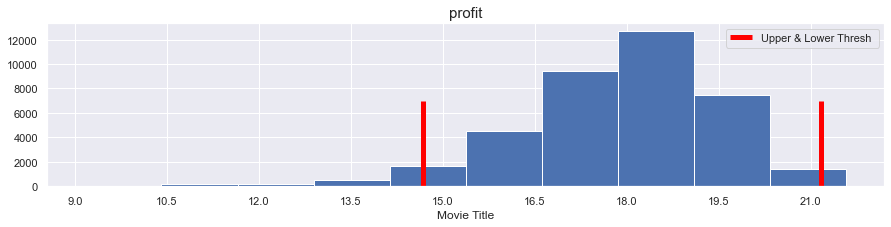

In [50]:

fig, ax = plt.subplots(figsize=(15,3))


frame = new300[new300.movie_profit > 0]

frame['logged_profit'] = np.log(frame.movie_profit)   #finding the log of the movie profits

ax.hist(frame.logged_profit)
upper_thresh = frame.logged_profit.mean() + frame.logged_profit.std() * 2
lower_thresh = frame.logged_profit.mean() - frame.logged_profit.std() * 2
ax.vlines(lower_thresh, ymin=0, ymax=7000, lw=5, color='red')
ax.vlines(upper_thresh, ymin=0, ymax=7000, lw=5, color='red')

# Add labels for x and y axes
ax.set_xlabel('Movie Title')


# Add a title for the plot
ax.set_title('profit', fontsize=15)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
# add a legend 
ax.legend(["Upper & Lower Thresh "], loc=1);




In [51]:
drop_outliers = frame[(frame.logged_profit > lower_thresh) & (frame.logged_profit < upper_thresh)]
drop_outliers.head(2)

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget,logged_profit
1,Pirates of the Caribbean: On Stranger Tides,Johnny Depp,Rotten,33.0,635063875,410600000,20.269236
1,Pirates of the Caribbean: On Stranger Tides,Penelope Cruz,Rotten,33.0,635063875,410600000,20.269236


# Determining 10 Actors who were in 10 or More of the Most Profitable Movies

1. **Isolating actors who have been in 10 or more movies.**

In [101]:
a_list_actors = drop_outliers.actors.value_counts()  #index = 65 
a_list_actors

 Michael Peña               18
 Morgan Freeman             17
 Joe Chrest                 17
 Ken Jeong                  16
 Anthony Mackie             16
                            ..
 Sydney Wieczkowski          1
 Aron Dyer                   1
 Jan Wojciech Paradowski     1
 Sondra Currie               1
 Charissa Shearer            1
Name: actors, Length: 26082, dtype: int64

In [148]:
a_list_actors = list(a_list_actors[a_list_actors >= 10].index)

In [149]:
top_list_actors = drop_outliers[drop_outliers.actors.isin(a_list_actors)]


2. **Singling Out 10 Actors who have been apart of the Most Profitable Films**

In [150]:
only10 = top_list_actors.groupby('actors').mean().sort_values('movie_profit', ascending=False).head(10)
only10

,tomatometer_rating,movie_profit,production_budget,logged_profit
actors,,,,
Stan Lee,77.857143,6.514434e+08,1.949000e+08,20.216857
Alan Tudyk,64.666667,5.275491e+08,1.276667e+08,19.728657
John Ratzenberger,85.200000,5.006799e+08,1.632500e+08,19.895521
Steve Coogan,60.400000,4.330496e+08,6.890000e+07,19.124078
Michael Caine,59.636364,3.911361e+08,1.278182e+08,19.420312
Idris Elba,71.000000,3.866333e+08,1.385846e+08,19.009065
Scarlett Johansson,81.900000,3.706662e+08,1.123100e+08,18.828986
Samuel L. Jackson,68.571429,3.623627e+08,1.361143e+08,19.112304
Benedict Cumberbatch,71.727273,3.184117e+08,1.235455e+08,18.749905


3. **Creating bar plot based on results.**

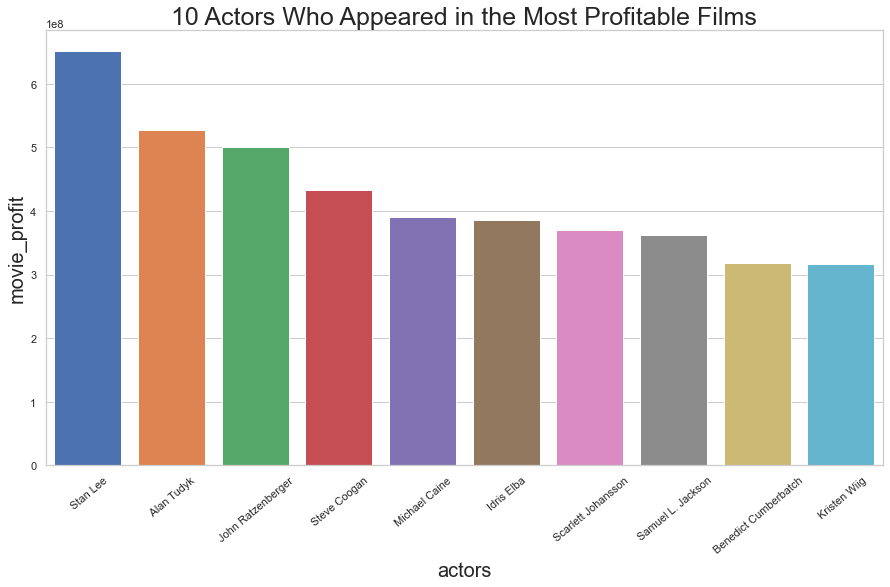

In [151]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')


plt.xlabel('actors',fontsize = 20)
plt.xticks(rotation=40)

plt.ylabel('movie_profit',fontsize = 20)
plt.title('10 Actors Who Appeared in the Most Profitable Films', fontsize=25)

sns.barplot(x= only10.index, y= only10['movie_profit'],saturation=85);



# **Determining the 20 Most Successful Movies**
    
 **Filtering out any movies with a profit less than 900,000 and a rating less than 85.**

In [152]:
movie_actor_budget2 = movie_actor_budget.copy()

In [58]:
movie_actor_budget4 = movie_actor_budget2[(movie_actor_budget2.movie_profit > 300000000) & (movie_actor_budget2.tomatometer_rating > 85) & (movie_actor_budget2.production_budget >150000000)]
movie_actor_budget4.sort_values(by='movie_profit', ascending=False, inplace=True)
movie_actor_budget4 = movie_actor_budget4.head(20)
movie_actor_budget4





,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
31,Black Panther,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",Certified-Fresh,96.0,1148258224,200000000
30,Incredibles 2,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H...",Certified-Fresh,93.0,1042520711,200000000
33,Skyfall,"Daniel Craig, Javier Bardem, Judi Dench, Naomi...",Certified-Fresh,92.0,910526981,200000000
11,Captain America: Civil War,"Chris Evans, Robert Downey Jr., Scarlett Johan...",Certified-Fresh,91.0,890069413,250000000
37,Toy Story 3,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty,...",Certified-Fresh,98.0,868879522,200000000
26,Finding Dory,"Ed O'Neill, Dominic West, Andrew Stanton, Benn...",Certified-Fresh,94.0,821215193,200000000
47,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Certified-Fresh,94.0,816996207,185000000
7,The Dark Knight Rises,"Christian Bale, Michael Caine, Gary Oldman, An...",Certified-Fresh,87.0,809439099,275000000
61,Spider-Man: Homecoming,"Tom Holland (II), Michael Keaton, Robert Downe...",Certified-Fresh,92.0,705166350,175000000
60,Inside Out,"Amy Poehler, Phyllis Smith, Richard Kind, Bill...",Certified-Fresh,98.0,679235992,175000000


In [61]:
import textwrap

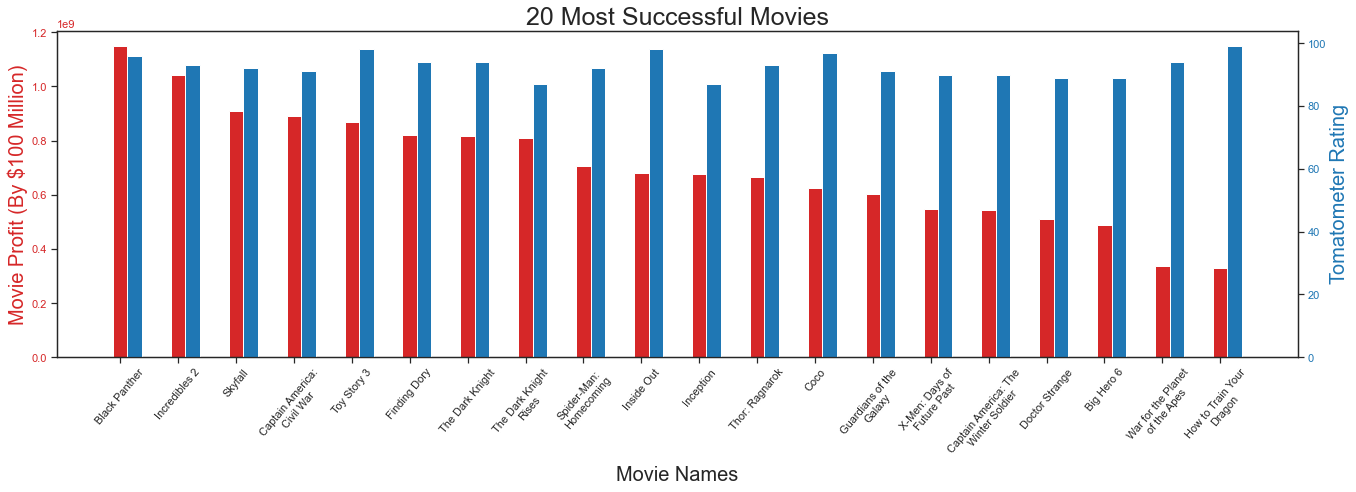

In [66]:
# t = movie_actor_budget3.movie_title
t2 = np.arange(20)
data1 = movie_actor_budget4.movie_profit
data2 = movie_actor_budget4.tomatometer_rating
width = 0.25

fig, ax1 = plt.subplots(figsize=(19,7))

color = 'tab:red'
ax1.set_title('20 Most Successful Movies', fontsize = 25)

ax1.set_xlabel('Movie Names', fontsize = 20)
ax1.set_ylabel('Movie Profit (By $100 Million)', color=color, fontsize =20)
plt.bar(t2, data1, width, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(t2, movie_actor_budget4['movie_title'])
plt.xticks(rotation=50)

#

f = lambda x: textwrap.fill(x.get_text(), 20)
ax1.set_xticklabels(map(f, ax1.get_xticklabels()))




ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Tomatometer Rating', color=color, fontsize=20)  # we already handled the x-label with ax1
plt.bar(t2+width,data2, width, color=color)
ax2.tick_params(axis='y', labelcolor=color)


sns.set_style("ticks")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show();

# Creating Pie Plot to Visualize the Most Profitable Actors Number of Appearances in the Most Successful Movies...
>**Profitable Actors: Top 10 actors in 10 or more of the most Profitable films**

>**Successful Movies: Movies with a Profit Above $300 Million and Tomatometer Rating Aabove 85**
  

1. **Singling Out Profitable Actors**

In [60]:
movie_for_actor = movie_actor_budget4.copy()       #reason to create a shallow copy?
movie_for_actor.actors = movie_for_actor.actors.str.split(',') #place each actor into a new list sepparated by commas
movie_for_actor

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
31,Black Panther,"[Chadwick Boseman, Michael B. Jordan, Lupita...",Certified-Fresh,96.0,1148258224,200000000
30,Incredibles 2,"[Craig T. Nelson, Holly Hunter, Sarah Vowell...",Certified-Fresh,93.0,1042520711,200000000
33,Skyfall,"[Daniel Craig, Javier Bardem, Judi Dench, N...",Certified-Fresh,92.0,910526981,200000000
11,Captain America: Civil War,"[Chris Evans, Robert Downey Jr., Scarlett Jo...",Certified-Fresh,91.0,890069413,250000000
37,Toy Story 3,"[Tom Hanks, Tim Allen, Joan Cusack, Ned Bea...",Certified-Fresh,98.0,868879522,200000000
26,Finding Dory,"[Ed O'Neill, Dominic West, Andrew Stanton, ...",Certified-Fresh,94.0,821215193,200000000
47,The Dark Knight,"[Christian Bale, Heath Ledger, Aaron Eckhart...",Certified-Fresh,94.0,816996207,185000000
7,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman,...",Certified-Fresh,87.0,809439099,275000000
61,Spider-Man: Homecoming,"[Tom Holland (II), Michael Keaton, Robert Do...",Certified-Fresh,92.0,705166350,175000000
60,Inside Out,"[Amy Poehler, Phyllis Smith, Richard Kind, ...",Certified-Fresh,98.0,679235992,175000000


In [ ]:
movie_for_actor = movie_for_actor.explode('actors')
movie_for_actor

2. **Taking the Actor Appearances in Most Successful Movies**

In [ ]:
actors_in_movies2 = movie_for_actor[movie_for_actor.actors.isin(only10.index)].drop_duplicates('movie_title')
actors_in_movies2.shape

3. **Taking the Total Number of Successful Movies**

In [ ]:
movie_actor_budget4.shape

4. **Calculating Actor in Movie Percentages**

In [ ]:
movie_actor_budget4.shape[0], actors_in_movies2.shape[0]

In [ ]:
actors_in_movies2.shape

In [ ]:
notinMovie = movie_actor_budget4.shape[0] - actors_in_movies2.shape[0]
notinMovie

5. **Creating a Pie Plot Displaying the Percentage of 10 Most Profitable Actors in the 20 Most Successful Movies.**

In [12]:
labels = 'Movies', 'Actors in Movies'
plotList = [notinMovie, actors_in_movies2.shape[0]]
y = plotList


fig1,ax1 = plt.subplots(figsize = (20,8))

my_explode = (0, 0.1)
myColors = ['b', 'orange']

ax1.pie(plotList, labels=labels, startangle=140, autopct='%1.1f%%', explode=my_explode, shadow = True, colors=myColors)
ax1.axis('equal')


plt.title('Percentage of 10 Most Profitable Actors in the 20 Most Successful Movies', fontsize = 25)

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=20) 
plt.rcParams['font.size'] = 18





plt.legend()
plt.show()

NameError: name 'notinMovie' is not defined